In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import timedelta
import plotly.graph_objects as go

%matplotlib inline

In [7]:
# sns.set(
#     font_scale=2,
#     style="whitegrid",
#     palette = "pastel",
#     rc={'figure.figsize':(20,7)}
#         )

---

## Подготовка

 **olist_customers_datase.csv** — таблица с уникальными идентификаторами пользователей
 
1. **customer_id** — позаказный идентификатор пользователя

1. **customer_unique_id** —  уникальный идентификатор пользователя  (аналог номера паспорта)

1. **customer_zip_code_prefix** —  почтовый индекс пользователя

1. **customer_city** —  город доставки пользователя

1. **customer_state** —  штат доставки пользователя

In [8]:
olist_customers_dataset = pd.read_csv('data\olist_customers_dataset.csv')
olist_customers_dataset

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [9]:
olist_customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


---

**olist_order_items_dataset.csv** —  товарные позиции, входящие в заказы

1. **order_id** —  уникальный идентификатор заказа (номер чека)

1. **order_item_id** —  идентификатор товара внутри одного заказа

1. **product_id** —  ид товара (аналог штрихкода)

1. **seller_id** — ид производителя товара

1. **shipping_limit_date** —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

1. **price** —  цена за единицу товара

1. **freight_value** —  вес товара

In [10]:
olist_order_items_dataset = pd.read_csv('data\olist_order_items_dataset.csv', 
                                       parse_dates=['shipping_limit_date'])
olist_order_items_dataset

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
2      2018-01-18 14:48:30  199.00          17.87  
3      2018-08-15 10:10:18   12.99          12.79  
4      2017-02-13 13:57:51  199.90          18.14  
...                    ...     ...            ...  
112645 2018-05-02 04:11:01  299.99          43.41  
112646 2018-07-20 04:31:48  350.00          36.53  
112647 2017-10-30 17:14:25   99.90          16.95  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [11]:
olist_order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


---

**olist_orders_dataset.csv** —  таблица заказов

1. **order_id** —  уникальный идентификатор заказа (номер чека)

1. **customer_id** —  позаказный идентификатор пользователя

1. **order_status** —  статус заказа

1. **order_purchase_timestamp** —  время создания заказа

1. **order_approved_at** —  время подтверждения оплаты заказа

1. **order_delivered_carrier_date** —  время передачи заказа в логистическую службу

1. **order_delivered_customer_date** —  время доставки заказа

1. **order_estimated_delivery_date** —  обещанная дата доставки

Уникальные статусы заказов

1. **created** —  создан
1. **approved** —  подтверждён
1. **invoiced** —  выставлен счёт
1. **processing** —  в процессе сборки заказа
1. **shipped** —  отгружен со склада
1. **delivered** —  доставлен пользователю
1. **unavailable** —  недоступен
1. **canceled** —  отменён

In [12]:
olist_orders_dataset = pd.read_csv('data\olist_orders_dataset.csv', 
                                   parse_dates=['order_purchase_timestamp', 'order_approved_at', 
                                                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                                                'order_estimated_delivery_date'])
olist_orders_dataset

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0                        2017-10-18  
1                        2018-08-13  
2                        2018-09-04  
3                        2017-12-15  
4                        2018-02-26  
...                             ...  
99436                    2017-03-28  
99437                    2018-03-02  
99438                    2017-09-27  
99439                    2018-02-15  
99440                    2018-04-03  

[99441 rows x 8 columns]

In [13]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


---

### Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой.

Заказ,  по  которому  была  осуществлена  оплата  и  который  был  доставлен  клиенту:
- **order_status**: "delivered"
- **order_approved_at**: не пустой
- **order_delivered_customer_date**: не пустой


In [14]:
purchase = olist_orders_dataset.query("order_approved_at.notna() and order_status == 'delivered'\
                            and order_delivered_customer_date.notna()").merge(olist_customers_dataset, on = 'customer_id')
purchase

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
96451  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
96452  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
96453  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
96454  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
96455  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
96451    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
96452    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
96453    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
96454    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
96455    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
96451          2017-03-10 11:18:03           2017-03-17 15:08:01   
96452          2018-02-07 23:22:42           2018-02-28 17:37:56   
96453          2017-08-28 20:52:26           2017-09-21 11:24:17   
96454          2018-01-12 15:35:03           2018-01-25 23:32:54   
96455          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                customer_unique_id  \
0                        2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                        2018-08-13  af07308b275d755c9edb36a90c618231   
2                        2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                        2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                        2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   
...                             ...                               ...   
96451                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
96452                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
96453                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
96454                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
96455                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

       customer_zip_code_prefix            customer_city customer_state  
0                          3149                sao paulo             SP  
1                         47813                barreiras             BA  
2                         75265               vianopolis             GO  
3                         59296  sao goncalo do amarante             RN  
4                          9195              santo andre             SP  
...                         ...                      ...            ...  
96451                     12209      sao jose dos campos             SP  
96452          

# Сколько у нас пользователей, которые совершили покупку только один раз?

In [15]:
one_order = purchase.groupby('customer_unique_id', as_index=0).agg({'order_id':'count'})\
             .sort_values('order_id').query("order_id == 1")
print(f"Число пользователей совершивших одну покупку - {len(one_order)}")

Число пользователей совершивших одну покупку - 90537


# Сколько заказов в месяц в среднем не доставляется по разным причинам?

**Заказы обещанная дата доставки которых меньше самой максимальной даты создания заказа (считаю эту дату как декущую) и при этом их статус недоставлен. Такие заказы считаю недоставленными**

In [16]:
dont_delivered = olist_orders_dataset.query("order_estimated_delivery_date < order_purchase_timestamp.max() and \
                                            order_status != 'delivered'").copy()
                                            
dont_delivered['order_estimated_month'] = dont_delivered['order_estimated_delivery_date'].dt.to_period('M').dt.to_timestamp()
dont_delivered.head(3)

order_id                       customer_id  \
6    136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103  0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   

    order_status order_purchase_timestamp   order_approved_at  \
6       invoiced      2017-04-11 12:22:08 2017-04-13 13:25:17   
44       shipped      2018-06-04 16:44:48 2018-06-05 04:31:18   
103     invoiced      2018-08-03 17:44:42 2018-08-07 06:15:14   

    order_delivered_carrier_date order_delivered_customer_date  \
6                            NaT                           NaT   
44           2018-06-05 14:32:00                           NaT   
103                          NaT                           NaT   

    order_estimated_delivery_date order_estimated_month  
6                      2017-05-09            2017-05-01  
44                     2018-06-28            2018-06-01  
103                    2018-08-21            2018-08-01

**Недоставляется заказов в месяц в среднем за все даты**

In [17]:
dont_delivered_per_month = len(dont_delivered) / olist_orders_dataset.order_approved_at.dt.to_period('M').nunique()

print(f"В среднем не доставляется {round(dont_delivered_per_month, 2)} заказа в месяц\
      \nВсего недоставленных заказов - {len(dont_delivered)}\
      \nВсего месяцев - {olist_orders_dataset.order_approved_at.dt.to_period('M').nunique()}")

В среднем не доставляется 123.29 заказа в месяц      
Всего недоставленных заказов - 2959      
Всего месяцев - 24


In [18]:
fig = px.histogram(dont_delivered, x = 'order_estimated_month', title='Недоставлено заказов')
fig.update_layout(bargap=0.2, 
                  xaxis_title="месяц",
                  yaxis_title="заказов")
fig.show()

In [19]:
dont_delivered_month = dont_delivered.groupby(['order_estimated_month', 'order_status'], as_index=0)\
                                     .agg({'order_id': 'count'})\
                    .rename(columns={'order_estimated_month':'date', 'order_id':'order_count'})

fig = px.bar(dont_delivered_month, x = 'date', 
             y='order_count', color='order_status', 
             title='Недоставлено заказов в зависимости от последнего статуса')

fig.update_layout(bargap=0.3, 
                  xaxis_title="месяц",
                  yaxis_title="заказов")
fig.show()

# По каждому товару определить, в какой день недели товар чаще всего покупается

In [20]:
# order_purchase_timestamp, product_id
order_item = pd.merge(olist_order_items_dataset, olist_orders_dataset, on = 'order_id', how = 'left')
order_item = order_item[['order_id', 'product_id', 'order_purchase_timestamp']]
order_item['day'] = order_item.order_purchase_timestamp.dt.strftime('%A')

order_item = order_item.groupby(['product_id', 'day'], as_index=0).agg({'order_id':'count'})\
          .groupby(['product_id'], as_index=0).agg({'day':'first', 'order_id':'max'})\
          .rename(columns={'order_id':'max_purchase_per_week'}).sort_values('max_purchase_per_week', ascending = 0)
order_item

product_id        day  max_purchase_per_week
8613   422879e10f46682990de24d770e7f83d     Friday                     93
19742  99a4788cb24856965c36a24e339b6058     Friday                     92
22112  aca2eb7d00ea1a7b8ebd4e68314663af     Friday                     89
10867  53b36df67ebb7c41585e8d54d6772e08     Friday                     76
7079   368c6c730842d78016ad823897a372db     Friday                     67
...                                 ...        ...                    ...
12761  62b07aff118f62756ee579afeedc3eb0   Thursday                      1
12760  62ae6a8f5789aec14529a277c7516def     Sunday                      1
12758  62abef05dddbd149514e4339c84f7d7d     Sunday                      1
12757  62a6991adbb1e60f5c03a77fae5568ff     Monday                      1
32950  fffe9eeff12fcbd74a2f2b007dde0c58  Wednesday                      1

[32951 rows x 3 columns]

In [21]:
fig = px.histogram(order_item, x='day', 
                   category_orders = dict(day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']),
                   title='Число покупок по дням недели'
                   )
fig.update_layout(bargap=0.2, 
                  xaxis_title="день",
                  yaxis_title="Покупок")
fig.show()

# Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [22]:
purchase_per_week = purchase[['customer_unique_id', 'order_purchase_timestamp', 'order_id']].copy()

In [23]:
purchase_per_week['month'] = purchase_per_week['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
purchase_per_week['day'] = purchase_per_week['month'].dt.days_in_month

In [24]:
purchase_per_week = purchase_per_week.groupby(['month', 'customer_unique_id'], as_index=0)\
                 .agg({'order_id':'count', 'day':'mean'})
purchase_per_week['week'] = round((purchase_per_week.day / 7), 3)
purchase_per_week['avg_purchase_per_week'] = round((purchase_per_week.order_id / purchase_per_week.week), 3)
purchase_per_week

month                customer_unique_id  order_id   day   week  \
0     2016-09-01  830d5b7aaa3b6f1e9ad63703bec97d23         1  30.0  4.286   
1     2016-10-01  0032c76b20340da25249092a268ce66c         1  31.0  4.429   
2     2016-10-01  01f156677184504063bd19739f924af1         1  31.0  4.429   
3     2016-10-01  0636d30c77f0f9cfad81f1c9b58c791f         1  31.0  4.429   
4     2016-10-01  06bdfbbe1857c3c925ec81abfb1c9666         1  31.0  4.429   
...          ...                               ...       ...   ...    ...   
95167 2018-08-01  ffc39051848c3ef2be36d1513aa3ad17         1  31.0  4.429   
95168 2018-08-01  ffc4e1cd8aa220763480d0a18157c45d         1  31.0  4.429   
95169 2018-08-01  ffe204b1bb8026741b839085b2fd10f2         1  31.0  4.429   
95170 2018-08-01  ffec490ab531184a483efe2eedd68908         1  31.0  4.429   
95171 2018-08-01  fff96bc586f78b1f070da28c4977e810         1  31.0  4.429   

       avg_purchase_per_week  
0                      0.233  
1                      0.226  
2                      0.226  
3                      0.226  
4                      0.226  
...                      ...  
95167                  0.226  
95168                  0.226  
95169                  0.226  
95170                  0.226  
95171                  0.226  

[95172 rows x 6 columns]

In [25]:
fig = px.histogram(purchase_per_week, x='month', y='avg_purchase_per_week', 
                   histfunc='avg', title='В среднем покупок в неделю по месяцам')
fig.update_layout(bargap=0.2, 
                  xaxis_title="месяц",
                  yaxis_title="Покупок в среднем")
fig.show()

# Выполните когортный анализ пользователей.

In [26]:
customers2 = olist_customers_dataset
orders2 =    olist_orders_dataset

orders2 = olist_orders_dataset.merge(olist_customers_dataset, on = 'customer_id')\
            [['order_purchase_timestamp', 'customer_unique_id', 'order_id']]

# Месяц первой покупки
orders2['order_purchase_month'] = pd.to_datetime(orders2['order_purchase_timestamp']).dt.to_period('M')
cohorts = orders2.groupby('customer_unique_id')['order_purchase_month'].min()

# Создание таблицы когорт
cohort_data = pd.DataFrame(cohorts).reset_index()
cohort_data.columns = ['customer_unique_id', 'cohort_month']

# Объединение таблиц
orders_with_cohorts = pd.merge(orders2, cohort_data, on='customer_unique_id')

# Определение месяца заказа
orders_with_cohorts['order_month'] = pd.to_datetime(orders_with_cohorts['order_purchase_timestamp']).dt.to_period('M')

# Расчет retention (в месяцах) как разница между текущим месяцем и первым месяцем покупки возвращаемая как число
orders_with_cohorts['period_number'] = (orders_with_cohorts['order_month'] - orders_with_cohorts['cohort_month'])\
                                        .apply(lambda x: x.n)

# таблица когортного анализа
cohort_pivot = orders_with_cohorts.pivot_table(index='cohort_month', 
                                              columns='period_number', 
                                              values='customer_unique_id', 
                                              aggfunc='nunique')

In [27]:
# Расчет Retention Rate
cohort_size = cohort_pivot.iloc[:,0]
retention_rate = cohort_pivot.divide(cohort_size, axis=0)

# Применение стиля к таблице
ur_style = (retention_rate
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .background_gradient(cmap='viridis', axis=0) # раскрашиваем ячейки по столбцам viridis (cividis палитра подходит для дальтоников)
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

In [28]:
# Определение когорты с наивысшим Retention на 3-й месяц
max_retention = retention_rate.iloc[3:15].iloc[:, 2].idxmax()
print(f"Когорта с наивысшим Retention на 3-й месяц: {max_retention}")

Когорта с наивысшим Retention на 3-й месяц: 2017-09


In [29]:
orders_with_cohorts

order_purchase_timestamp                customer_unique_id  \
0          2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff   
1          2017-09-04 11:26:38  7c396fd4830fd04220f754e42b4e5bff   
2          2018-07-24 20:41:37  af07308b275d755c9edb36a90c618231   
3          2018-08-08 08:38:49  3a653a41f6f9fc3d2a113cf8398680e8   
4          2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977   
...                        ...                               ...   
99436      2017-03-09 09:54:05  6359f309b166b0196dbf7ad2ac62bb5a   
99437      2018-02-06 12:58:58  da62f9e57a76d978d02ab5362c509660   
99438      2017-08-27 14:46:43  737520a9aad80b3fbbdad19b66b37b30   
99439      2018-01-08 21:28:27  5097a5312c8b157bb7be58ae360ef43c   
99440      2018-03-08 20:57:30  60350aa974b26ff12caad89e55993bd6   

                               order_id order_purchase_month cohort_month  \
0      e481f51cbdc54678b7cc49136f2d6af7              2017-10      2017-09   
1      69923a4e07ce446644394df37a710286              2017-09      2017-09   
2      53cdb2fc8bc7dce0b6741e2150273451              2018-07      2018-07   
3      47770eb9100c2d0c44946d9cf07ec65d              2018-08      2018-08   
4      949d5b44dbf5de918fe9c16f97b45f8a              2017-11      2017-11   
...                                 ...                  ...          ...   
99436  9c5dedf39a927c1b2549525ed64a053c              2017-03      2017-03   
99437  63943bddc261676b46f01ca7ac2f7bd8              2018-02      2018-02   
99438  83c1379a015df1e13d02aae0204711ab              2017-08      2017-08   
99439  11c177c8e97725db2631073c19f07b62              2018-01      2018-01   
99440  66dea50a8b16d9b4dee7af250b4be1a5              2018-03      2018-03   

      order_month  period_number  
0         2017-10              1  
1         2017-09              0  
2         2018-07              0  
3         2018-08              0  
4         2017-11              0  
...           ...            ...  
99436     2017-03              0  
99437     2018-02              0  
99438     2017-08              0  
99439     2018-01              0  
99440     2018-03              0  

[99441 rows x 7 columns]

# RFM-сегментация

In [30]:
RFM = olist_orders_dataset.merge(olist_customers_dataset, on = 'customer_id').merge(olist_order_items_dataset, on = 'order_id')
RFM.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2018-08-13  af07308b275d755c9edb36a90c618231   
2                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     47813                barreiras             BA   
2                     75265               vianopolis             GO   
3                     59296  sao goncalo do amarante             RN   
4                      9195              santo andre             SP   

   order_item_id                        product_id  \
0              1  87285b34884572647811a353c7ac498a   
1              1  595fac2a385ac33a80bd5114aec74eb8   
2              1  aa4383b373c6aca5d8797843e5594415   
3              1  d0b61bfb1de832b15ba9d266ca96e5b0   
4              1  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id shipping_limit_date   price  freight_value  
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15   29.99           8.72  
1  289cdb325fb7e7f891c38608bf9e0962 2018-07-30 03:24:27  118.70          22.76  
2  4869f7a5dfa277a7dca6462dcf3b52b2 2018-08-13 08:55:23  159.90          19.22  
3  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59   45.00          27.20  
4  2c9e548be18521d1c43cde1c582c6de8 2018-02-19 20:31:37   19.90           8.72

In [31]:
# Разница в днях между самой ранней и самой последней покупкой 
print(RFM.order_purchase_timestamp.max() - RFM.order_purchase_timestamp.min())

# Установка периода и дня который как-бы последний
period = 729

now = RFM.order_purchase_timestamp.max() + timedelta(days=1)
now

728 days 11:51:38


Timestamp('2018-09-04 09:06:57')

In [32]:
# Отбираем нужные поля
orders = RFM[['order_id', 'order_purchase_timestamp', 'customer_unique_id', 'price']].copy()

# Считаем сумму денег которую принем клиент
orders = orders.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=0).agg({'price':'sum'})

# Считаем количество дней между датой покупки и сегодняшним днем
orders['DaysSinceOrder'] = orders['order_purchase_timestamp'].apply(lambda x: (now - x).days)

orders.head()

order_id order_purchase_timestamp  \
0  00010242fe8c5a6d1ba2dd792cb16214      2017-09-13 08:59:02   
1  00018f77f2f0320c557190d7a144bdd3      2017-04-26 10:53:06   
2  000229ec398224ef6ca0657da4fc703e      2018-01-14 14:33:31   
3  00024acbcdf0a6daa1e931b038114c75      2018-08-08 10:00:35   
4  00042b26cf59d7ce69dfabb4e55b4fd9      2017-02-04 13:57:51   

                 customer_unique_id   price  DaysSinceOrder  
0  871766c5855e863f6eccc05f988b23cb   58.90             356  
1  eb28e67c4c0b83846050ddfb8a35d051  239.90             495  
2  3818d81c6709e39d06b2738a8d3a2474  199.00             232  
3  af861d436cfc08b2c2ddefd0ba074622   12.99              26  
4  64b576fb70d441e8f1b2d7d446e483c5  199.90             576

In [33]:
# Создаем метрики Recency и Frequency

aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # Recency
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= now - timedelta(days=period)]), # Frequency
}

rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

customer_unique_id  Recency  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1
2  0000f46a3911fa3c0805444483337064      542          1
3  0000f6ccb0745a6a4b88665a16c9f078      326          1
4  0004aac84e0df4da2b147fca70cf8255      293          1

In [34]:
# Выбираем заказы сделанные в заданный период
delta_time = (orders['order_purchase_timestamp'] >= now - timedelta(days=period))

# Фильтруем заказы и группируем их по 'customer_unique_id', суммируя 'price'
grouped_orders = orders.loc[delta_time].groupby('customer_unique_id')['price'].sum().reset_index()

# Переименовываем столбцы
grouped_orders.columns = ['customer_unique_id', 'Monetary']

# Объединяем с rfm и заполняем пропущенные значения нулями
rfm = rfm.merge(grouped_orders, on='customer_unique_id', how='left')
rfm['Monetary'].fillna(0, inplace=True)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90
2  0000f46a3911fa3c0805444483337064      542          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00

In [35]:
# границы метрик с помощью квантилей
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [36]:
# Функции расчета рангов для метрик
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1   

def f_score(x, c):
    if x <= 1:
        return 1
    elif x <= 4:
        return 2
    elif x <= 8:
        return 3
    elif x <= 12:
        return 4
    else:
        return 5  

def m_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 

In [37]:
# Расчет рангов метрик
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x, 'Monetary'))

rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90  4  1  4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90  4  1  1   
2  0000f46a3911fa3c0805444483337064      542          1     69.00  1  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00  2  1  5   

  RFM_Score  
0       414  
1       411  
2       112  
3       211  
4       215

In [38]:
# Сегментация в зависимости от ранга
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90  4  1  4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90  4  1  1   
2  0000f46a3911fa3c0805444483337064      542          1     69.00  1  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00  2  1  5   

  RFM_Score      Segment  
0       414    promising  
1       411    promising  
2       112  hibernating  
3       211  hibernating  
4       215  hibernating

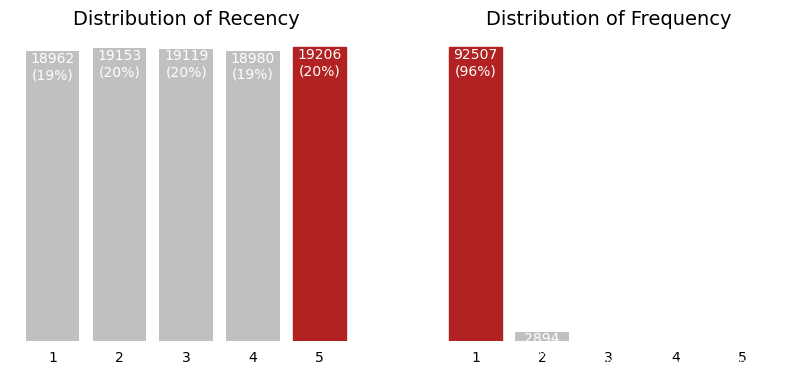

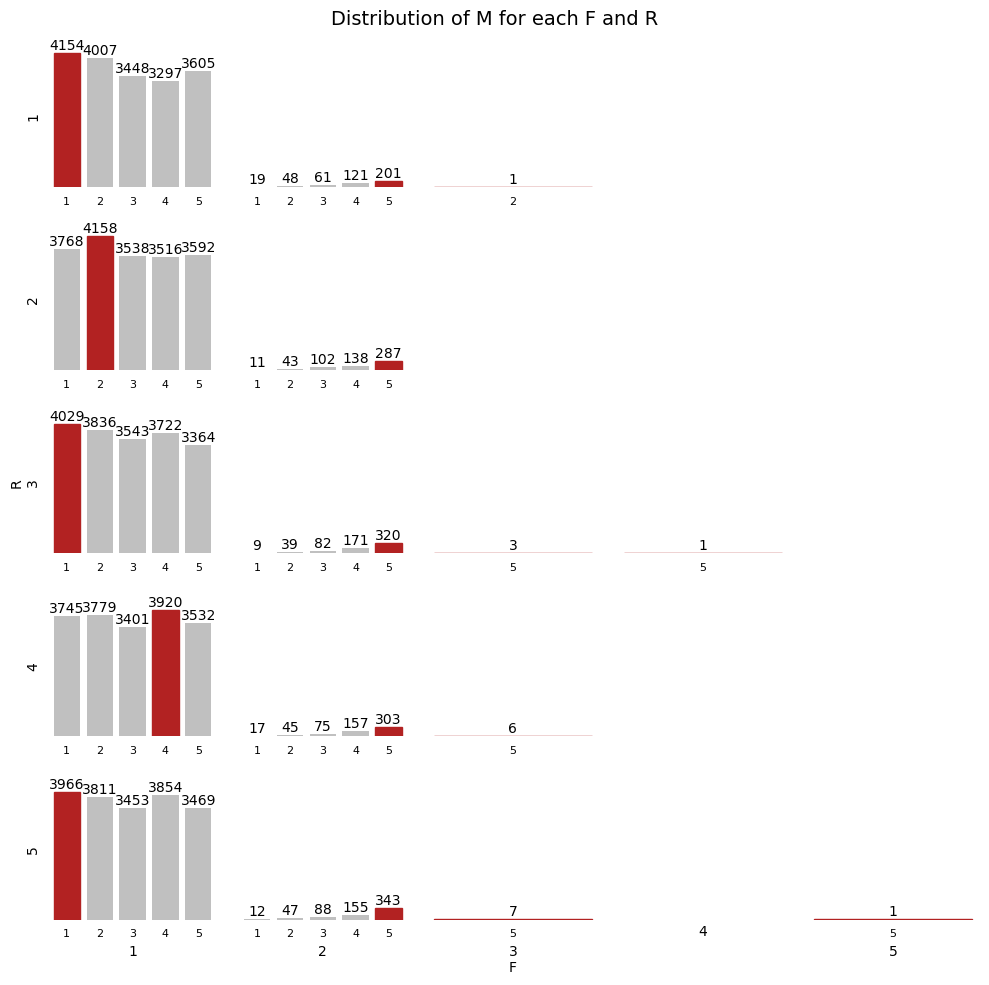

In [39]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w'
               )

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

Recency распределен равномерно

Частота покупок клиентов очень низкая, 96% имеет частоту покупок 1

Больше всего тратят клиенты с Frequency 1 и любым Recency, но это обусловленно тем, что это почти все клиенты

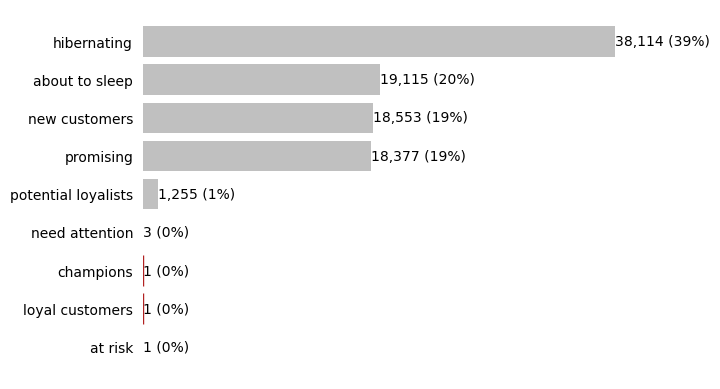

In [40]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Всего можно сказать отсутствуют лояльные клиенты

Большинство клиентов спящие (39%)

20% клиентов почти спящие и существует риск потерять их

Мы имеем много новых клиентов (38%)

In [41]:
# Границы метрик для кластеров

result = rfm.groupby('RFM_Score', as_index=0).agg({'R': 'mean', 'F': 'mean', 'M': 'mean',
                                          'Recency': ['min', 'max'],
                                          'Frequency': ['min', 'max'],
                                          'Monetary': ['min', 'max', 'count'],
                                         })
result.columns = ['RFM_Score', 'R_mean', 'F_mean', 'M_mean', 'Recency_min', 'Recency_max', 
                  'Frequency_min', 'Frequency_max', 'Monetary_min', 'Monetary_max', 'Count']

In [42]:
result.style.background_gradient()

### Для создания RFM-сегментации пользователей я использовал следующий подход:

1. **Слияние данных:**
    - Сначала я объединил несколько наборов данных для получения полной информации о заказах, клиентах и деталях заказов.
1. **Установка временных рамок:** 
    - Я определил период анализа (в данном случае 729 дней) и установил дату “сегодня” как день после самой последней покупки в данных.
1. **Подготовка данных:**
    - Выбрал необходимые поля из объединенного набора данных.
    - Сгруппировал данные по уникальным идентификаторам заказов и клиентов, суммируя стоимость заказов.
    - Рассчитал количество дней с момента каждого заказа до “сегодняшнего” дня.
1. **Расчет метрик RFM:**
    - Recency (R): Использовал минимальное значение DaysSinceOrder для каждого клиента, чтобы определить, как давно клиент совершил последнюю покупку.
    - Frequency (F): Подсчитал количество заказов, сделанных каждым клиентом в течение установленного периода.
    - Monetary (M): Суммировал стоимость всех заказов, сделанных каждым клиентом в течение установленного периода.
1. **Квантильное разделение:**
    - Определил квантили для каждой метрики, чтобы разделить клиентов на группы по каждой метрике.
1. **Расчет рангов:**
    - Создал функции для расчета рангов по каждой метрике, используя квантили.
    - Применил эти функции к данным, чтобы получить ранги для каждого клиента.
1. **Создание RFM-сегментов:**
    - Определил сегменты на основе комбинаций рангов R и F.
    - Присвоил каждому клиенту сегмент, используя регулярные выражения для сопоставления с паттернами рангов.
1. **Итоговая таблица:**
    - Получил итоговый DataFrame с метриками RFM, рангами и сегментами для каждого клиента.